In [10]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [11]:
import numpy as np

mnist_train = mnist.train.images
mnist_labels = np.asarray(mnist.train.labels, dtype = np.int32)
eval_data = mnist.test.images
eval_labels = np.asarray(mnist.test.labels, dtype=np.int32)



In [12]:
mnist_train.shape

(55000, 784)

In [13]:
mnist_labels.shape

(55000, 10)

(-0.5, 27.5, 27.5, -0.5)

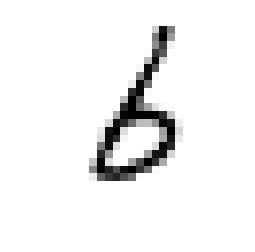

In [17]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

some_random_figure = mnist_train[2342];
some_random_figure = some_random_figure.reshape(28, 28)
plt.imshow(some_random_figure, cmap = matplotlib.cm.binary, interpolation="nearest")
plt.axis("off")
